<a href="https://colab.research.google.com/github/sharmariya19/Time-Series-Prediction/blob/main/Average_Energy_Consumption_Demand_on_Spanish_electricity_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Preprocessing

In [ ]:
jan_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=0)
jan = jan_df.iloc[147]

In [ ]:
jan

2007                       32481.46204
2008                        32802.0416
2009                       31851.82492
2010                       31656.21112
2011                       31824.37931
2012                       31000.28432
2013                       30174.25072
2014                       29572.31858
2015                       30511.05384
2016                       28956.44383
2017                       30986.15217
2018                       30496.84338
2019                       31467.85673
2020                       29782.23125
2021                       29599.68052
2022                        29417.1298
2023                       29234.57907
Average demand                     NaN
Electrical Availability            NaN
Unnamed: 19                        NaN
Máximum Value                      NaN
Name: 147, dtype: object

2007                       32481.46204
2008                        32802.0416
2009                       31851.82492
2010                       31656.21112
2011                       31824.37931
2012                       31000.28432
2013                       30174.25072
2014                       29572.31858
2015                       30511.05384
2016                       28956.44383
2017                       30986.15217
2018                       30496.84338
2019                       31467.85673
2020                       29782.23125
2021                       29599.68052
2022                        29417.1298
2023                       29234.57907
Average demand                     NaN
Electrical Availability            NaN
Unnamed: 19                        NaN
Máximum Value                      NaN
Name: 147, dtype: object

In [ ]:
feb_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=1)
feb = feb_df.iloc[147]

In [ ]:
mar_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=2)
apr_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=3)
may_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=4)
jun_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=5)
jul_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=6)
aug_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=7)
sep_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=8)
oct_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=9)
nov_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=10)
dec_df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Metervalues/Resume_Raw_Data.xlsx', sheet_name=11)


In [ ]:
mar = mar_df.iloc[147]
apr = apr_df.iloc[147]
may = may_df.iloc[147]
jun = jun_df.iloc[147]
jul = jul_df.iloc[147]
aug = aug_df.iloc[147]
sep = sep_df.iloc[147]
oct = oct_df.iloc[147]
nov = nov_df.iloc[147]
dec = dec_df.iloc[147]


<Axes: >

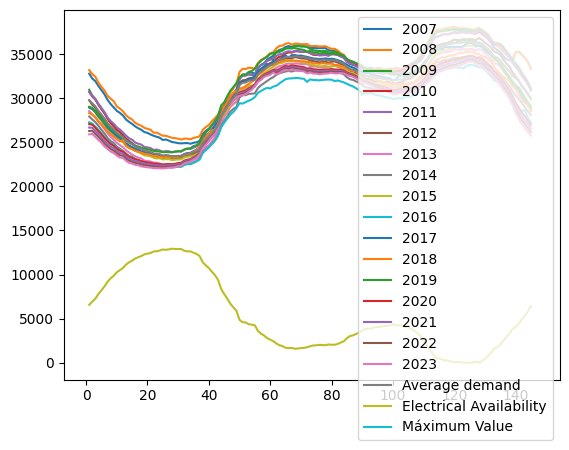

<Axes: >

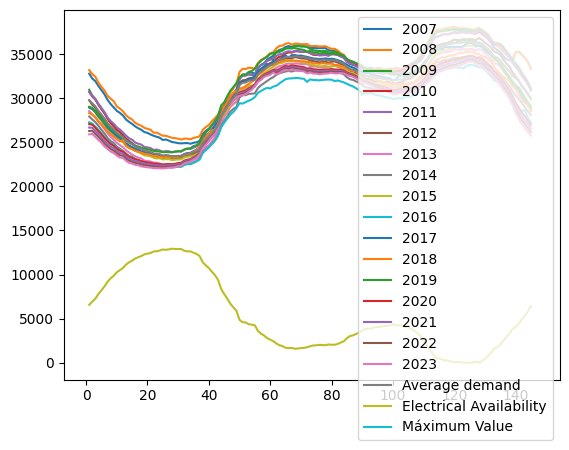

In [ ]:
jan_df.plot()

<Axes: >

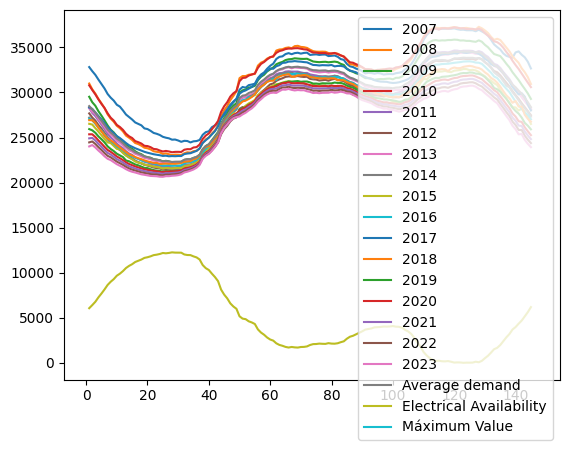

<Axes: >

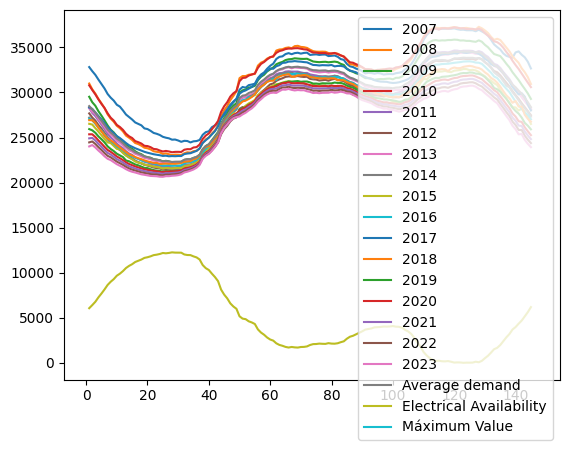

In [ ]:
dec_df.plot()

In [ ]:
months = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

In [ ]:
df = pd.DataFrame(columns = ['ds', 'y'])

In [ ]:
for month in range(0,12):
  for year in range(13): # 2007 to 2019
    if month<9:
      df = df.append({'ds': f'{months[month].index[year]}-0{month+1}', 'y':months[month].iloc[year] }, ignore_index= True)
    else:
      df = df.append({'ds': f'{months[month].index[year]}-{month+1}', 'y':months[month].iloc[year] }, ignore_index= True)


<ipython-input-72-d99e61e12b0f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'ds': f'{months[month].index[year]}-0{month+1}', 'y':months[month].iloc[year] }, ignore_index= True)
<ipython-input-72-d99e61e12b0f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'ds': f'{months[month].index[year]}-0{month+1}', 'y':months[month].iloc[year] }, ignore_index= True)
<ipython-input-72-d99e61e12b0f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'ds': f'{months[month].index[year]}-0{month+1}', 'y':months[month].iloc[year] }, ignore_index= True)
<ipython-input-72-d99e61e12b0f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [ ]:
df.head()

,ds,y
0,2007-01,32481.46204
1,2008-01,32802.04160
2,2009-01,31851.82492
3,2010-01,31656.21112
4,2011-01,31824.37931


,ds,y
0,2007-01,32481.46204
1,2008-01,32802.04160
2,2009-01,31851.82492
3,2010-01,31656.21112
4,2011-01,31824.37931


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      156 non-null    object 
 1   y       156 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      156 non-null    object 
 1   y       156 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [ ]:
df.describe()

,y
count,156.000000
mean,28861.888740
std,1639.271181
min,25931.254480
25%,27656.686265
50%,28717.899110
75%,30053.142757
max,32802.041600


,y
count,156.000000
mean,28861.888740
std,1639.271181
min,25931.254480
25%,27656.686265
50%,28717.899110
75%,30053.142757
max,32802.041600


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      156 non-null    datetime64[ns]
 1   y       156 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      156 non-null    datetime64[ns]
 1   y       156 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [ ]:
df.sort_values(by = 'ds', ascending= True, inplace=True)

In [ ]:
df

,ds,y
0,2007-01-01,32481.46204
13,2007-02-01,31242.05900
26,2007-03-01,30098.91390
39,2007-04-01,27914.13517
52,2007-05-01,27929.94149
...,...,...
103,2019-08-01,28704.55551
116,2019-09-01,27796.06805
129,2019-10-01,27141.18710
142,2019-11-01,29014.05310


,ds,y
0,2007-01-01,32481.46204
13,2007-02-01,31242.05900
26,2007-03-01,30098.91390
39,2007-04-01,27914.13517
52,2007-05-01,27929.94149
...,...,...
103,2019-08-01,28704.55551
116,2019-09-01,27796.06805
129,2019-10-01,27141.18710
142,2019-11-01,29014.05310


<Axes: xlabel='ds'>

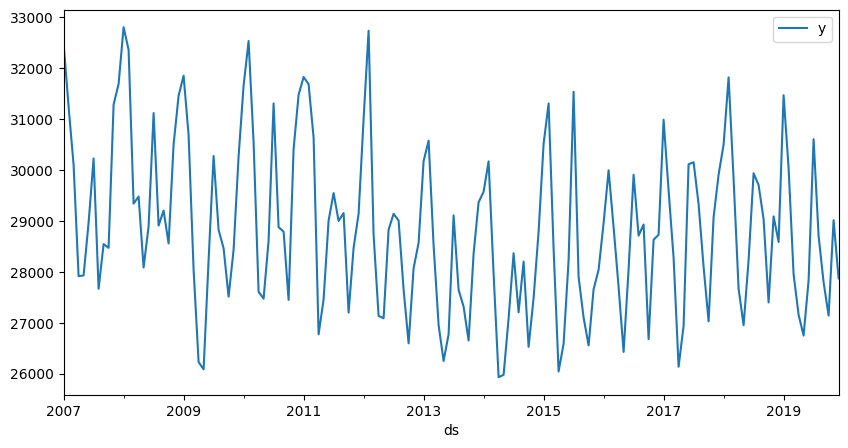

<Axes: xlabel='ds'>

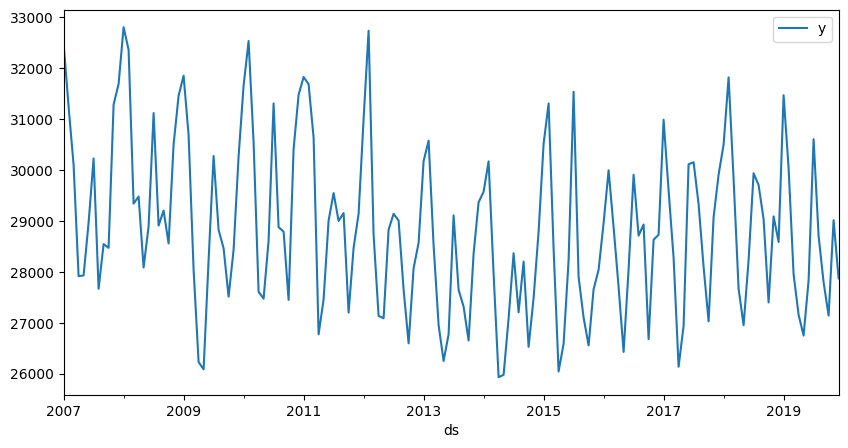

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df.plot.line(x = 'ds', y='y',ax=ax)

<Axes: >

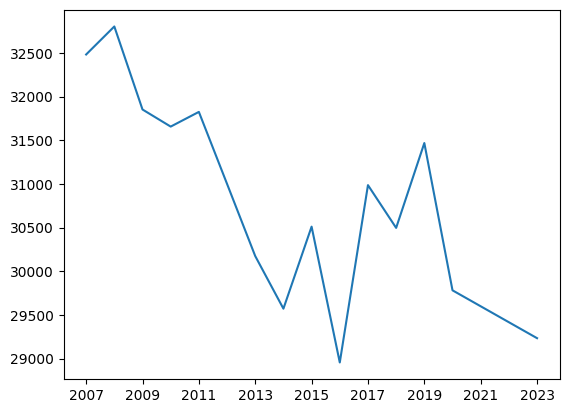

<Axes: >

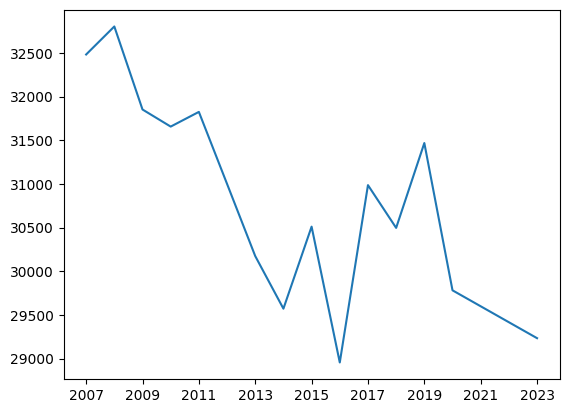

In [ ]:
jan.plot()

<Axes: >

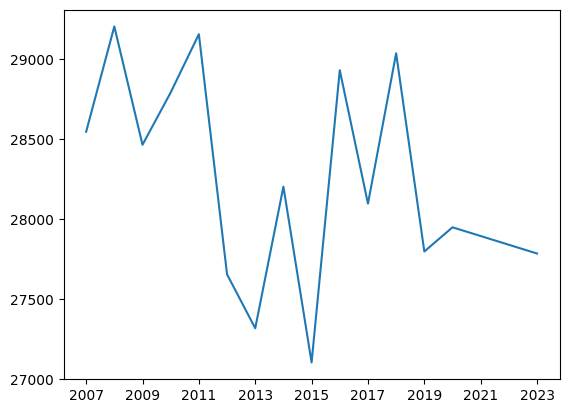

<Axes: >

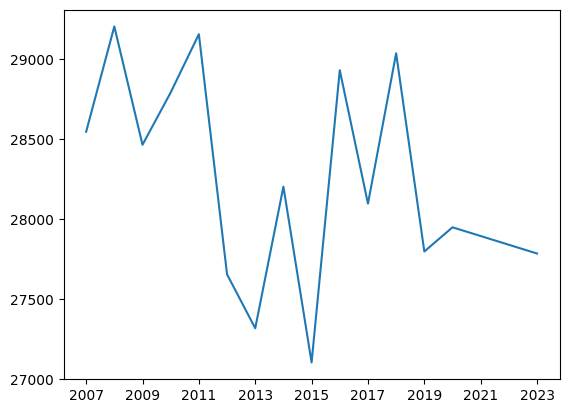

In [ ]:
sep.plot()

### FBProphet

#### Prediction on 2018-2019 data

In [ ]:
train = df[df['ds']<'2018-01-01']

In [ ]:
test = df[df['ds']>='2018-01-01']

In [ ]:
test.reset_index(drop=True, inplace = True)

In [ ]:
train.reset_index(drop=True, inplace = True)

In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu06r708/pq3_ynip.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu06r708/5c1teaxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12112', 'data', 'file=/tmp/tmpuu06r708/pq3_ynip.json', 'init=/tmp/tmpuu06r708/5c1teaxa.json', 'output', 'file=/tmp/tmpuu06r708/prophet_modelf84uid6l/prophet_model-20230427064710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu06r708/vo6dhetg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu06r708/bkxwmab1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76731', 'data', 'file=/tmp/tmpuu06r708/vo6dhetg.json', 'init=/tmp/tmpuu06r708/bkxwmab1.json', 'output', 'file=/tmp/tmpuu06r708/prophet_modelhw_2py03/prophet_model-20230427064740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = pd.DataFrame(test['ds'])

In [ ]:
future

,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [ ]:
forecast = model.predict(future)


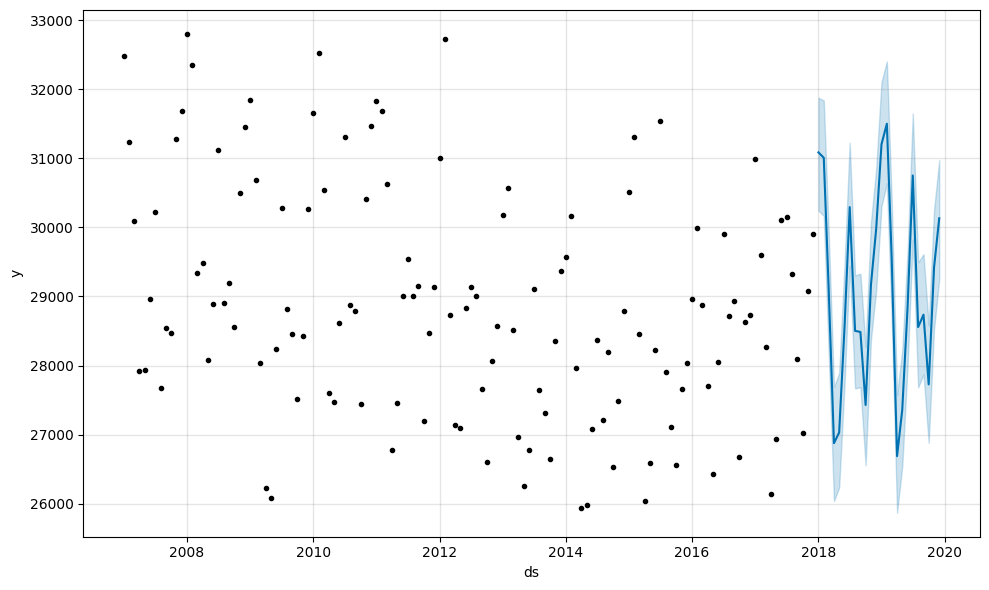

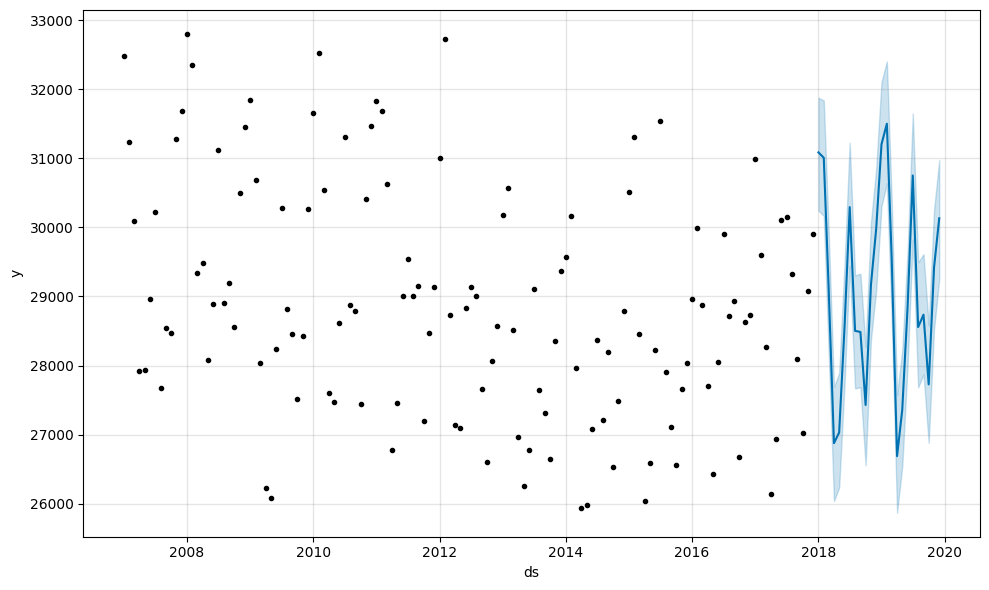

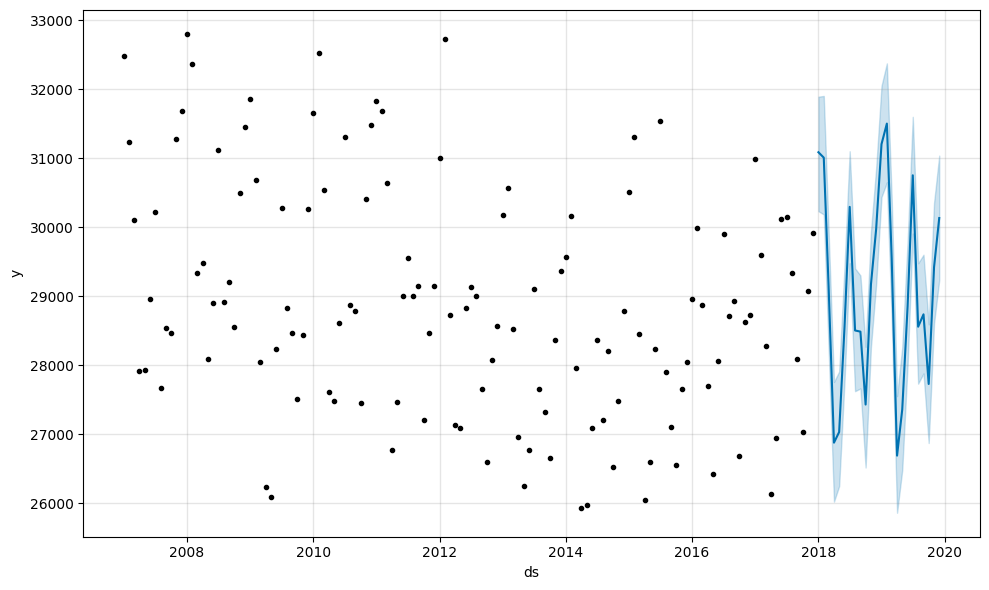

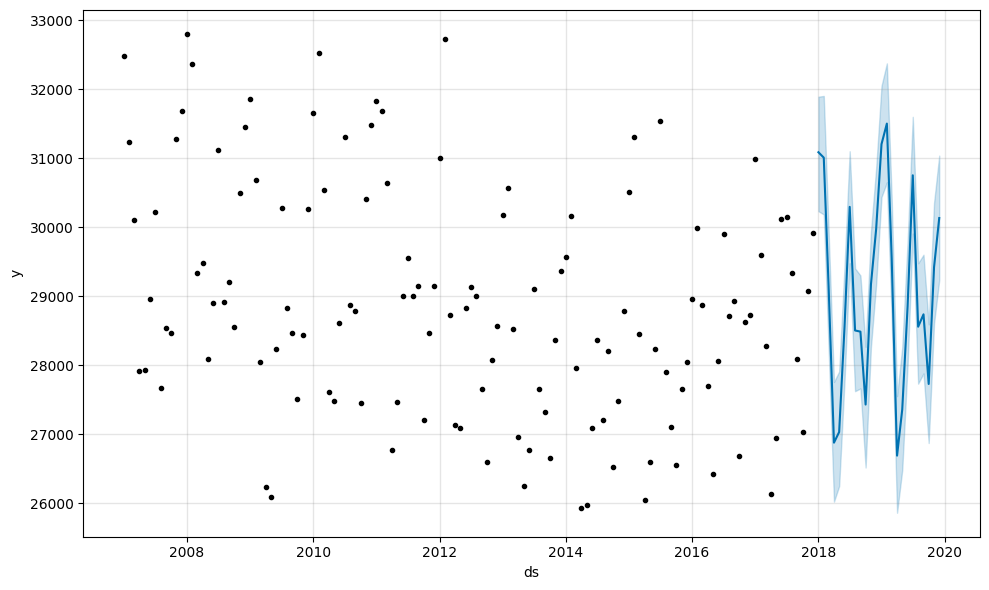

In [ ]:
model.plot(forecast)


In [ ]:
future

,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [ ]:
forecast = forecast[['ds', 'trend', 'yhat_lower' , 'yhat_upper', 'yhat']]

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,yhat
0,2018-01-01,28864.722710,30242.237664,31879.053127,31086.883897
1,2018-02-01,28885.886214,30167.149964,31838.327546,31008.396836
2,2018-03-01,28905.001637,28220.786350,29965.854114,29138.674454
3,2018-04-01,28926.165141,26036.756438,27691.919320,26875.330006
4,2018-05-01,28946.645951,26233.505136,27888.812263,27029.809231
5,2018-06-01,28967.809455,27720.203136,29457.138300,28548.801010
6,2018-07-01,28988.290265,29441.408909,31227.192234,30294.529414
7,2018-08-01,29009.453769,27668.965982,29304.588562,28502.358549
8,2018-09-01,29030.617273,27685.496503,29329.502777,28485.491996
9,2018-10-01,29051.098084,26553.077479,28272.376170,27428.222975


,ds,trend,yhat_lower,yhat_upper,yhat
0,2018-01-01,28864.722710,30231.631473,31892.275287,31086.883897
1,2018-02-01,28885.886214,30184.350702,31902.887200,31008.396836
2,2018-03-01,28905.001637,28247.326924,29938.502153,29138.674454
3,2018-04-01,28926.165141,26020.077465,27755.769454,26875.330006
4,2018-05-01,28946.645951,26244.672307,27906.252822,27029.809231
5,2018-06-01,28967.809455,27764.606686,29421.379462,28548.801010
6,2018-07-01,28988.290265,29477.205961,31101.362352,30294.529414
7,2018-08-01,29009.453769,27621.981683,29402.392118,28502.358549
8,2018-09-01,29030.617273,27661.261536,29300.422146,28485.491996
9,2018-10-01,29051.098084,26515.071374,28265.052375,27428.222975


In [ ]:
pred = forecast['yhat']

In [ ]:
true = test['y']

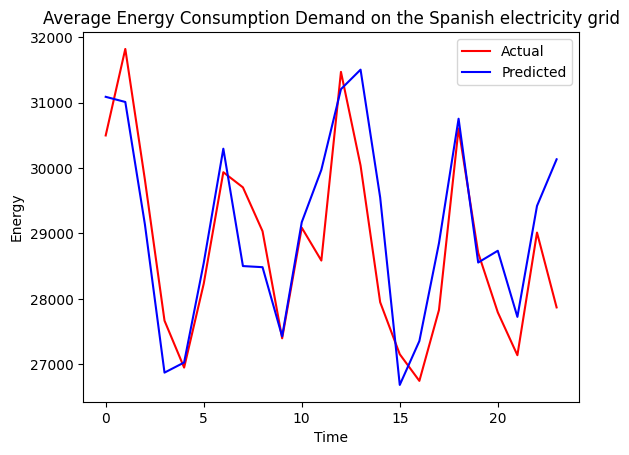

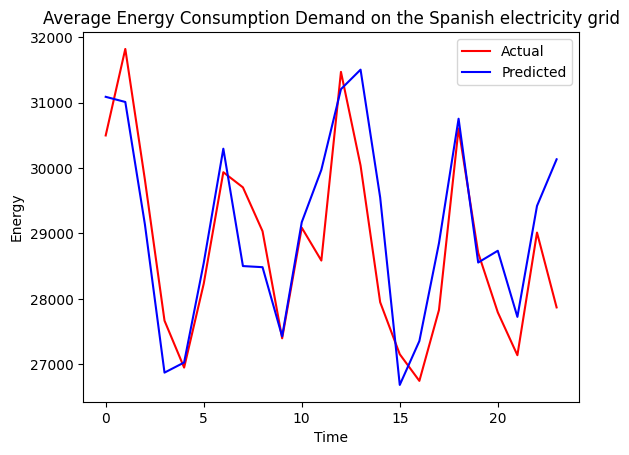

In [ ]:
plt.plot(true, color = 'red', label = 'Actual')
plt.plot(pred, color = 'blue', label = 'Predicted')
plt.title('Average Energy Consumption Demand on the Spanish electricity grid')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [ ]:
mean_absolute_error(true, pred)

699.7515890598776

699.7515890598776

In [ ]:
mean_absolute_percentage_error(true, pred)

0.024409598292055967

0.024409598292055967

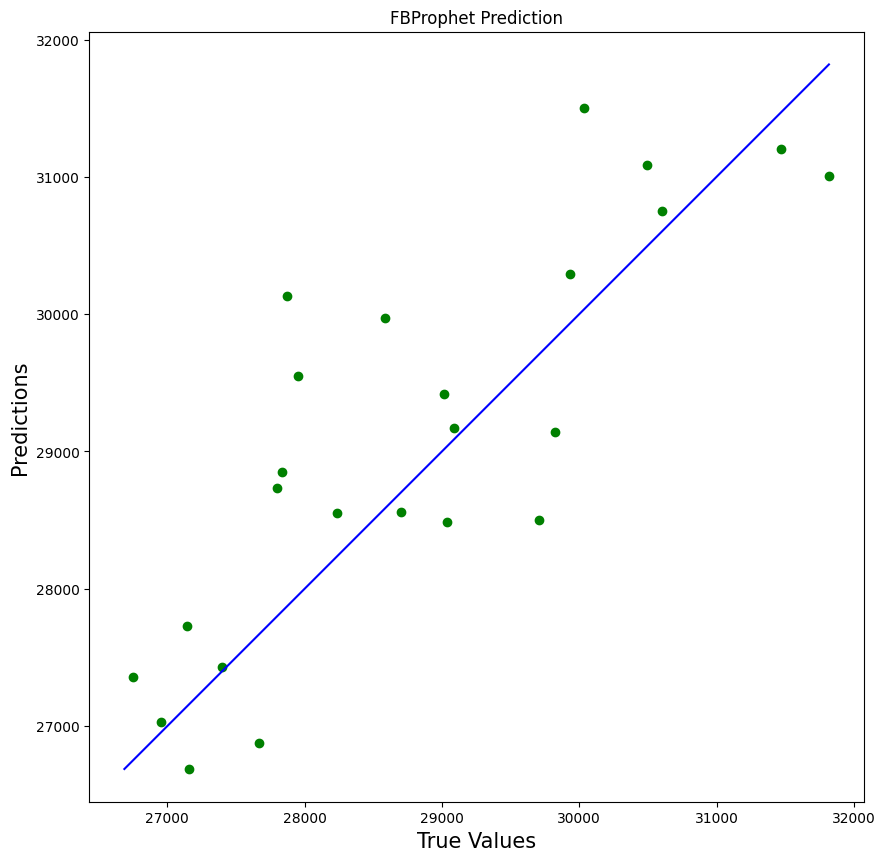

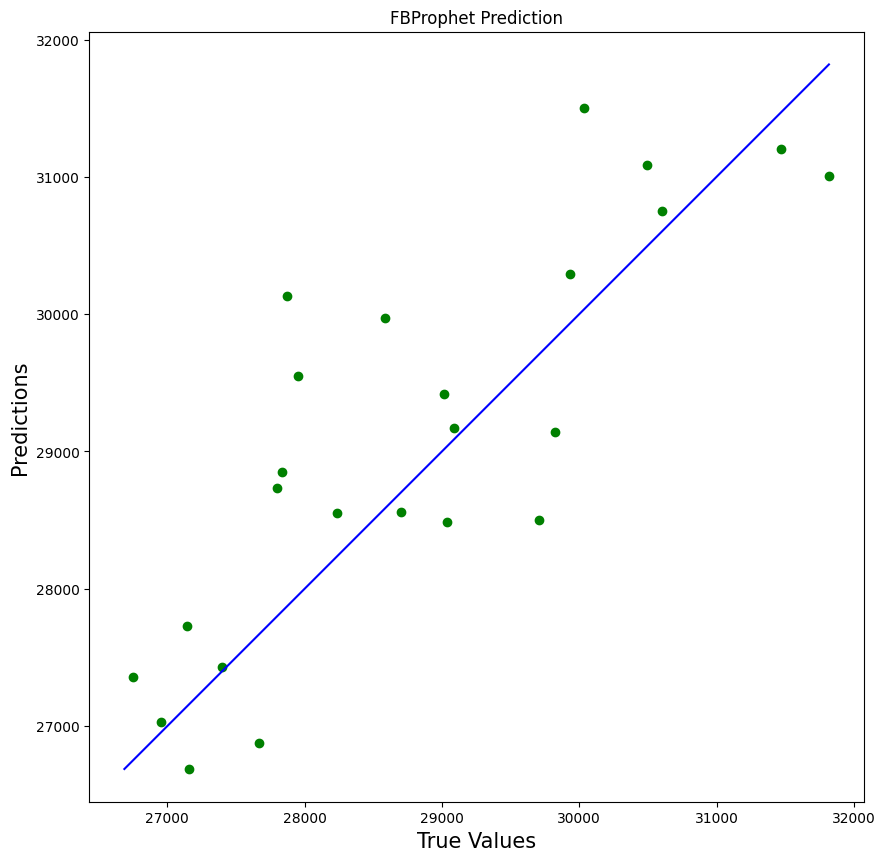

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(true, pred,  c='green')

p1 = max(max(true), max(pred))
p2 = min(min(true), min(pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('FBProphet Prediction')
plt.axis('equal')
plt.show()

#### Prediction on 2021 to 2023 data

In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu06r708/xz9t7oa3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu06r708/eh3a0i7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81711', 'data', 'file=/tmp/tmpuu06r708/xz9t7oa3.json', 'init=/tmp/tmpuu06r708/eh3a0i7l.json', 'output', 'file=/tmp/tmpuu06r708/prophet_modelat7g4fsp/prophet_model-20230427064712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu06r708/98upvsy6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu06r708/hgahhn0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71417', 'data', 'file=/tmp/tmpuu06r708/98upvsy6.json', 'init=/tmp/tmpuu06r708/hgahhn0m.json', 'output', 'file=/tmp/tmpuu06r708/prophet_modeln4lnhohi/prophet_model-20230427064741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=36, freq='M')


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'trend', 'yhat']]

,ds,yhat_lower,yhat_upper,trend,yhat
0,2007-01-01,31118.450604,32834.587026,29923.924866,32039.273919
1,2007-02-01,31371.090214,33120.746699,29908.875375,32216.898278
2,2007-03-01,29267.271434,31075.102942,29895.282287,30149.765869
3,2007-04-01,26788.818296,28577.990124,29880.232797,27679.349247
4,2007-05-01,27011.412804,28857.025990,29865.668774,27946.152664
...,...,...,...,...,...
187,2022-07-31,27651.039621,29438.543020,29373.179648,28538.359433
188,2022-08-31,27885.341436,29630.649226,29385.676777,28742.616893
189,2022-09-30,27052.706732,28947.625484,29397.770773,27989.210034
190,2022-10-31,28754.911874,30513.424177,29410.267902,29670.608117


,ds,yhat_lower,yhat_upper,trend,yhat
0,2007-01-01,31137.375858,32950.669490,29923.924866,32039.273919
1,2007-02-01,31298.928604,33148.137475,29908.875375,32216.898278
2,2007-03-01,29272.943535,31020.985711,29895.282287,30149.765869
3,2007-04-01,26745.656194,28567.064039,29880.232797,27679.349247
4,2007-05-01,27012.322387,28830.541068,29865.668774,27946.152664
...,...,...,...,...,...
187,2022-07-31,27625.622168,29421.992104,29373.179648,28538.359433
188,2022-08-31,27760.412564,29635.875630,29385.676777,28742.616893
189,2022-09-30,27015.406231,28885.737957,29397.770773,27989.210034
190,2022-10-31,28730.686897,30578.466538,29410.267902,29670.608117


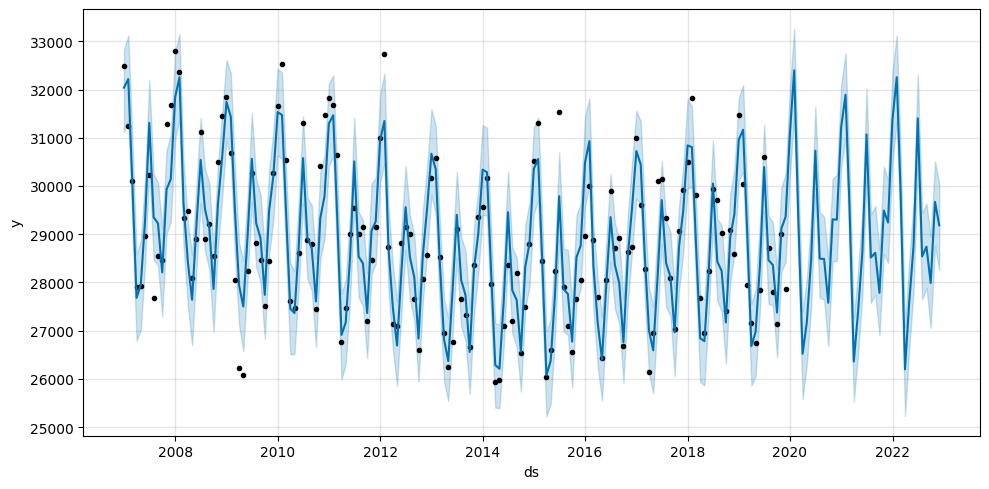

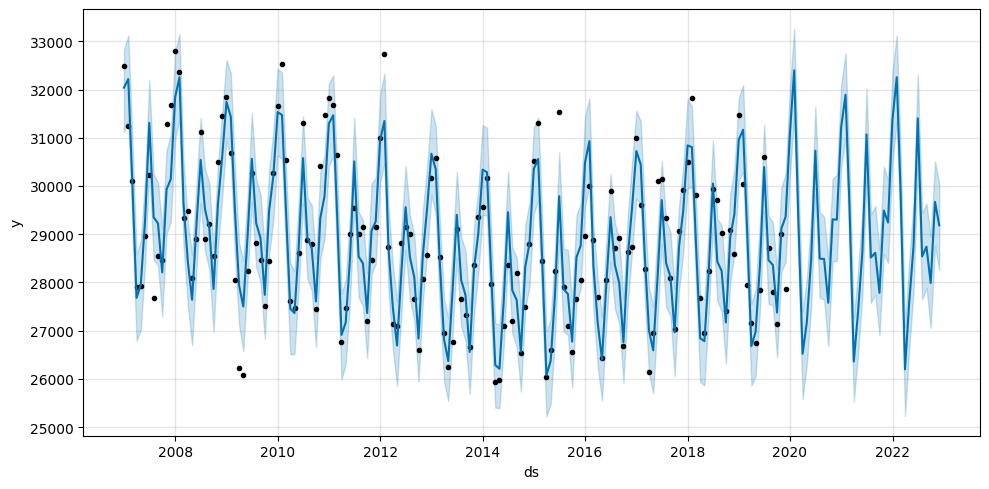

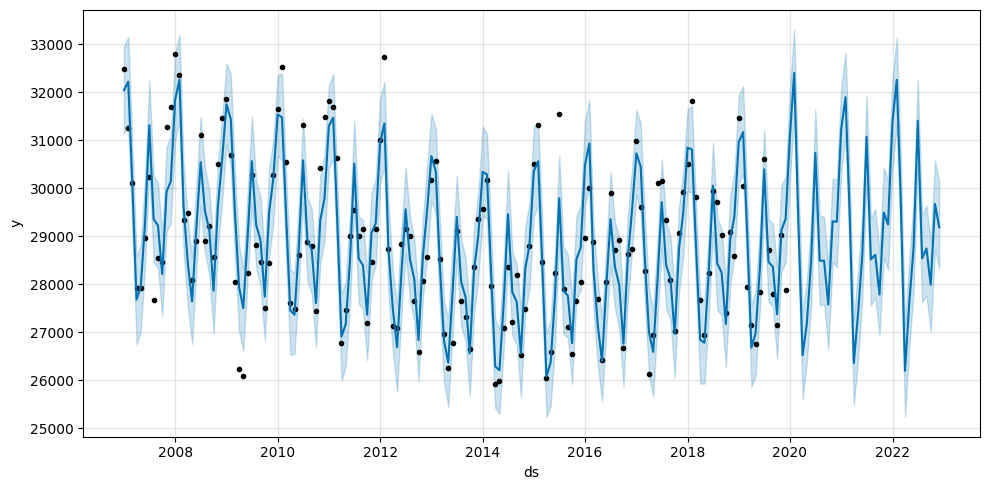

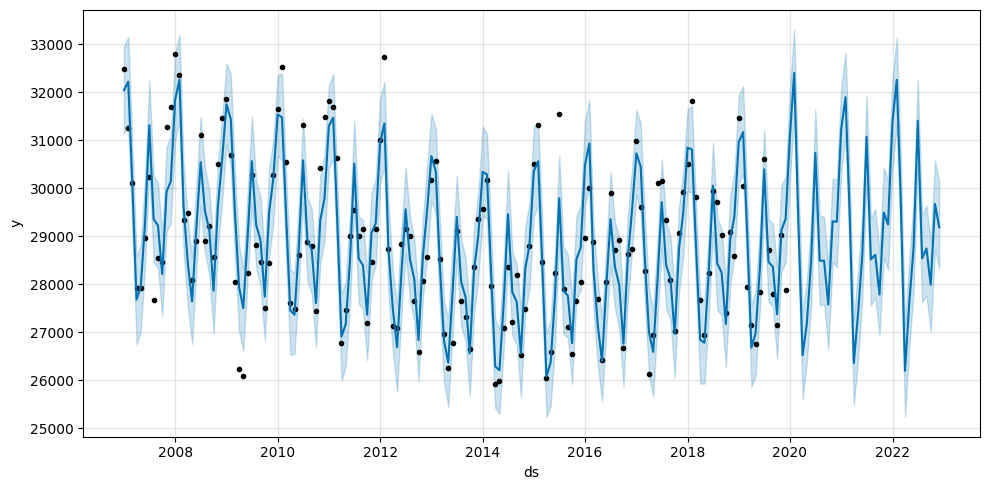

In [ ]:
fig, ax = plt.subplots(figsize= (10,5))
model.plot(forecast, ax=ax)

#### Prediction on training dataset

In [ ]:
train_predict = list()
for i in range(df.shape[0]):
  train_predict.append([df.iloc[i]['ds']])

In [ ]:
train_predict = pd.DataFrame(train_predict)

In [ ]:
train_predict.columns = ['ds']

In [ ]:
train_predict['ds'] = pd.to_datetime(train_predict['ds'])

In [ ]:
train_forecast = model.predict(train_predict)

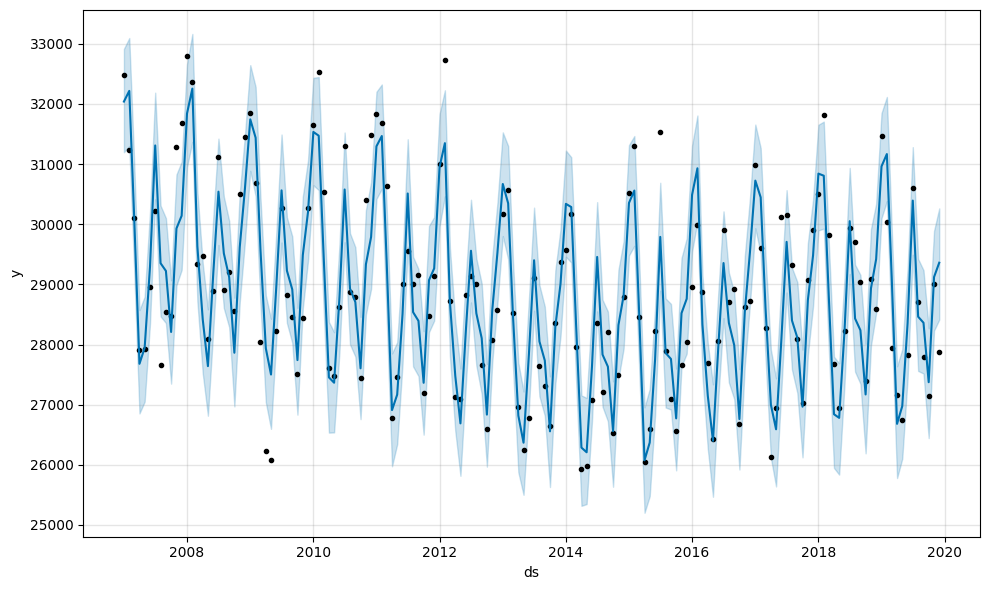

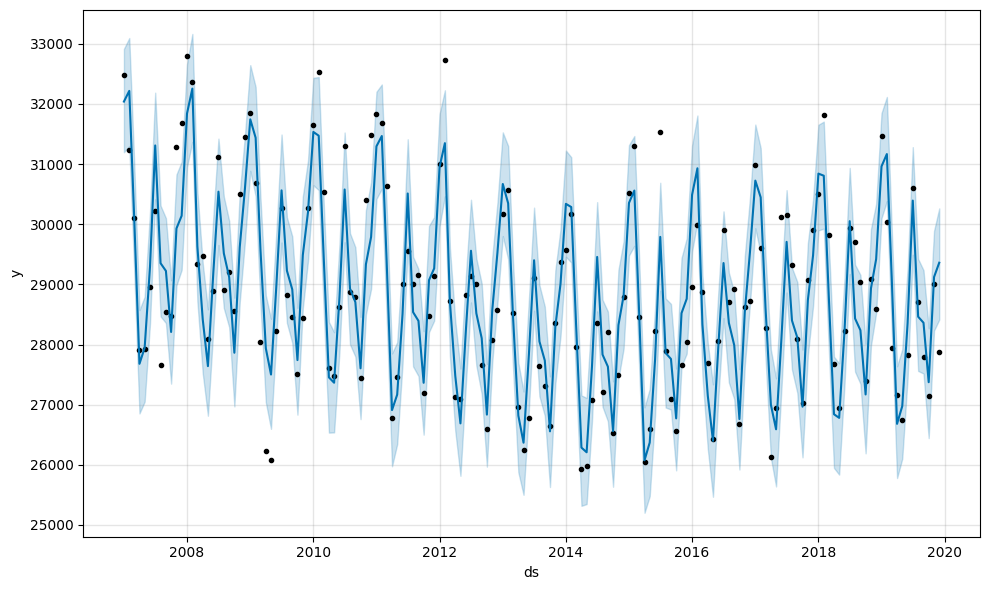

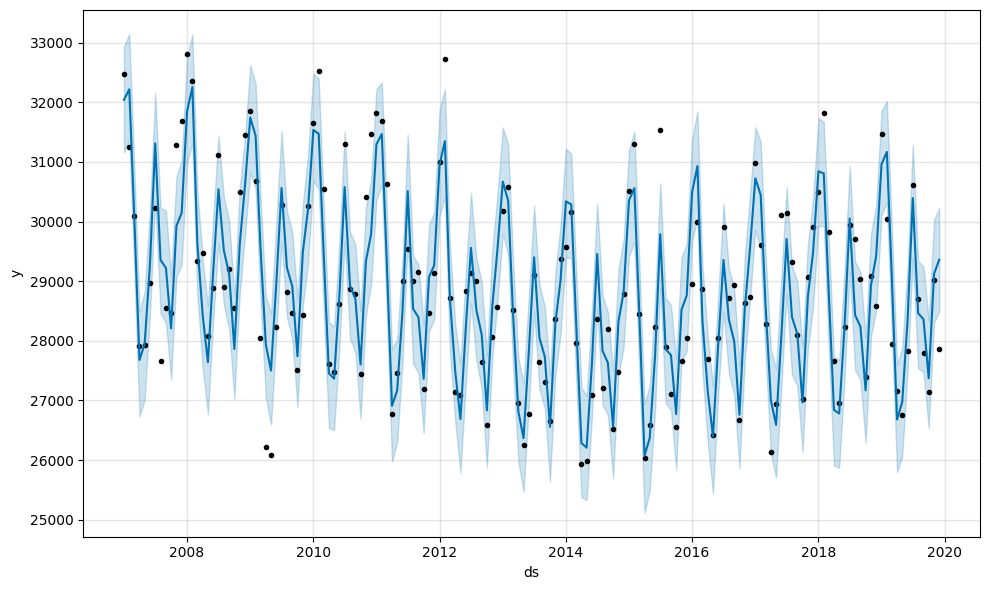

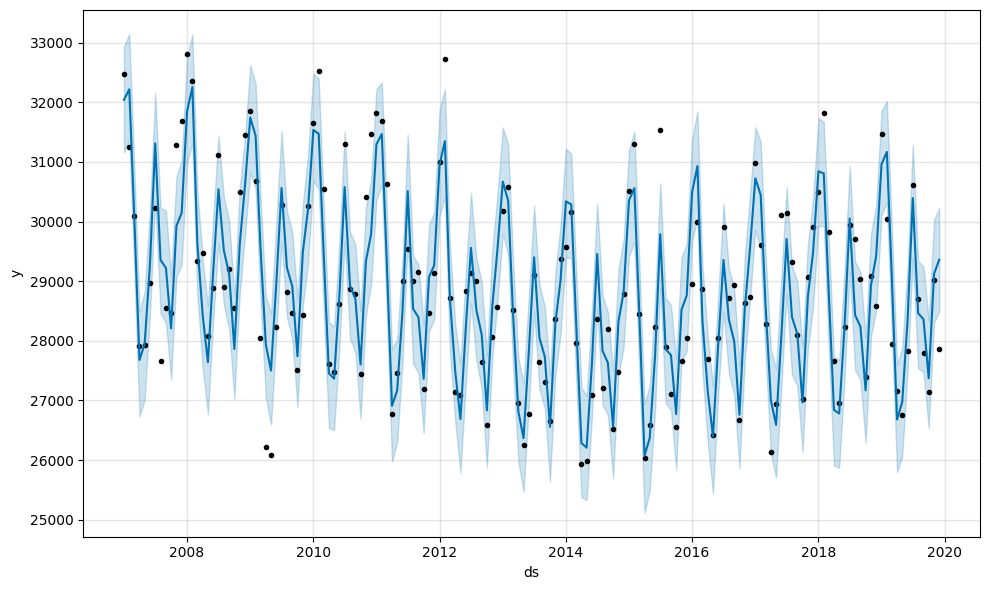

In [ ]:
model.plot(train_forecast)

In [ ]:
y_train_pred = train_forecast['yhat'].values

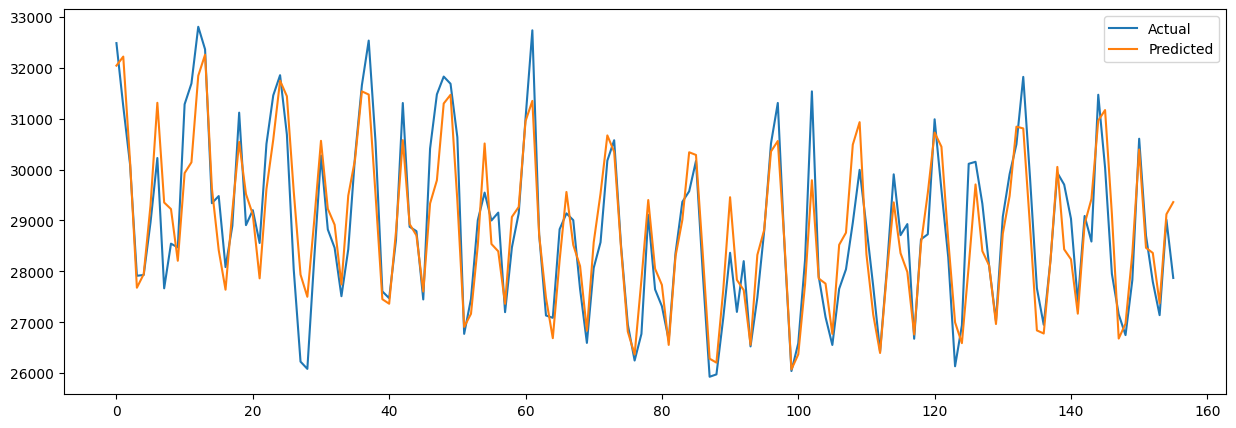

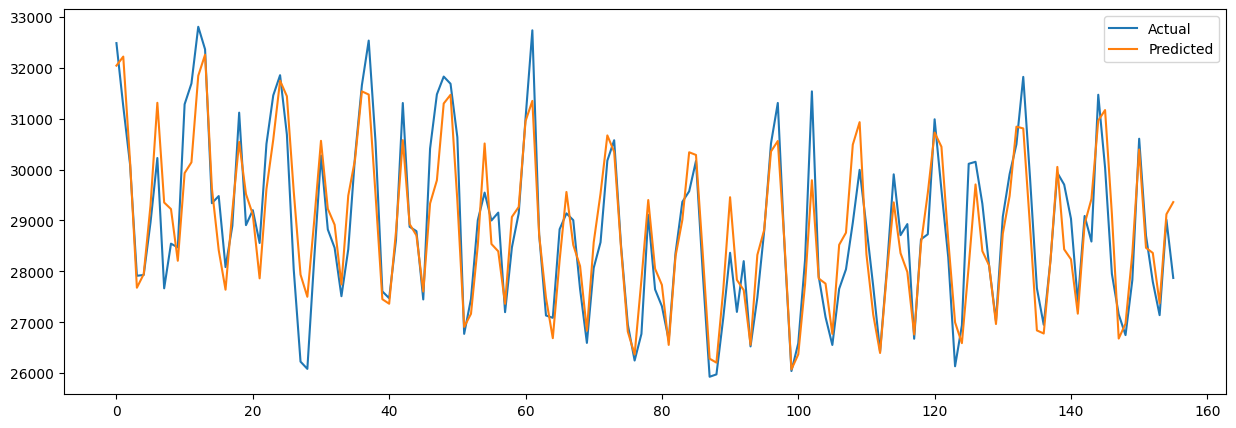

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['y'].values, label = 'Actual')
plt.plot(y_train_pred, label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
mean_absolute_error(y_train_pred, df['y'])

543.463633677392

543.463633677392

In [ ]:
mean_absolute_percentage_error(y_train_pred, df['y'])

0.01865293044209688

0.01865293044209688